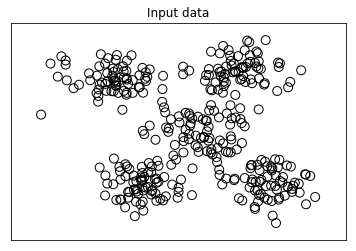

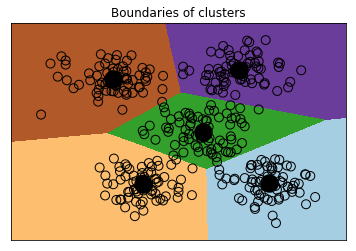

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

%matplotlib inline

# Load input data
X = np.loadtxt('data_clustering.txt', delimiter=',')
num_clusters = 5

# Plot input data
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', 
        edgecolors='black', s=80)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# Create KMeans object 
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

# Train the KMeans clustering model
kmeans.fit(X)

# Step size of the mesh
step_size = 0.01

# Define the grid of points to plot the boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size), 
        np.arange(y_min, y_max, step_size))

# Predict output labels for all the points on the grid 
output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

# Plot different regions and color them 
output = output.reshape(x_vals.shape)
plt.figure()
plt.clf()
plt.imshow(output, interpolation='nearest',
           extent=(x_vals.min(), x_vals.max(), 
               y_vals.min(), y_vals.max()),
           cmap=plt.cm.Paired, 
           aspect='auto', 
           origin='lower')

# Overlay input points
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', 
        edgecolors='black', s=80)

# Plot the centers of clusters
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], 
        marker='o', s=210, linewidths=4, color='black', 
        zorder=12, facecolors='black')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Boundaries of clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [5]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y)
print(xx)
print(yy)
print(xx.ravel())
print(yy.ravel())
print(np.c_[xx.ravel(), yy.ravel()])

[[-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 ...
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]]
[[-5.  -5.  -5.  ... -5.  -5.  -5. ]
 [-4.9 -4.9 -4.9 ... -4.9 -4.9 -4.9]
 [-4.8 -4.8 -4.8 ... -4.8 -4.8 -4.8]
 ...
 [ 4.7  4.7  4.7 ...  4.7  4.7  4.7]
 [ 4.8  4.8  4.8 ...  4.8  4.8  4.8]
 [ 4.9  4.9  4.9 ...  4.9  4.9  4.9]]
[-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
[-5.  -5.  -5.  ...  4.9  4.9  4.9]
[[-5.  -5. ]
 [-4.9 -5. ]
 [-4.8 -5. ]
 ...
 [ 4.7  4.9]
 [ 4.8  4.9]
 [ 4.9  4.9]]



Centers of clusters:
 [[2.95568966 1.95775862]
 [7.17563636 2.18145455]
 [2.17603774 8.03283019]
 [5.97960784 8.39078431]
 [4.81044444 5.07111111]]

Number of clusters in input data = 5


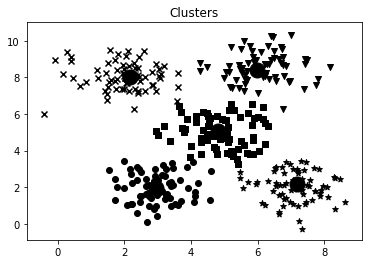

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

# Load data from input file
X = np.loadtxt('data_clustering.txt', delimiter=',')

# Estimate the bandwidth of X
bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))

# Cluster data with MeanShift
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X)

# Extract the centers of clusters
cluster_centers = meanshift_model.cluster_centers_
print('\nCenters of clusters:\n', cluster_centers)

# Estimate the number of clusters
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print("\nNumber of clusters in input data =", num_clusters)

# Plot the points and cluster centers
plt.figure()
markers = 'o*xvs'
for i, marker in zip(range(num_clusters), markers):
    # Plot points that belong to the current cluster
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker, color='black')

    # Plot the cluster center
    cluster_center = cluster_centers[i]
    plt.plot(cluster_center[0], cluster_center[1], marker='o', 
            markerfacecolor='black', markeredgecolor='black', 
            markersize=15)

plt.title('Clusters')
plt.show()


Number of clusters = 2
Silhouette score = 0.47762624870454473

Number of clusters = 3
Silhouette score = 0.5471742411734871

Number of clusters = 4
Silhouette score = 0.5770200623338163

Number of clusters = 5
Silhouette score = 0.5890032635647954

Number of clusters = 6
Silhouette score = 0.6096904118954452

Number of clusters = 7
Silhouette score = 0.5577656670453394

Number of clusters = 8
Silhouette score = 0.49662923536261355

Number of clusters = 9
Silhouette score = 0.45530210595578313

Optimal number of clusters = 6


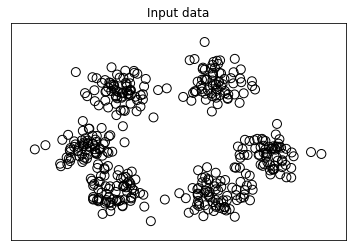

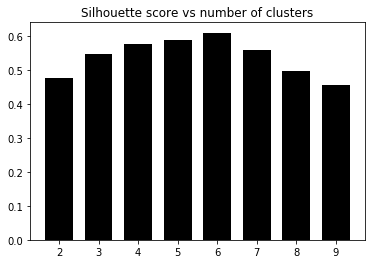

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

# Load data from input file
X = np.loadtxt('data_quality.txt', delimiter=',')

# Plot input data
plt.figure()
plt.scatter(X[:,0], X[:,1], color='black', s=80, marker='o', facecolors='none')
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# Initialize variables
scores = []
values = np.arange(2, 10)

# Iterate through the defined range
for num_clusters in values:
    # Train the KMeans clustering model
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    score = metrics.silhouette_score(X, kmeans.labels_, 
                metric='euclidean', sample_size=len(X))

    print("\nNumber of clusters =", num_clusters)
    print("Silhouette score =", score)
                    
    scores.append(score)

# Plot silhouette scores
plt.figure()
plt.bar(values, scores, width=0.7, color='black', align='center')
plt.title('Silhouette score vs number of clusters')

# Extract best score and optimal number of clusters
num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters =', num_clusters)

plt.show()

Accuracy on training data = 87.5
Accuracy on testing data = 86.66666666666667


/home/zog/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/zog/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/zog/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warning

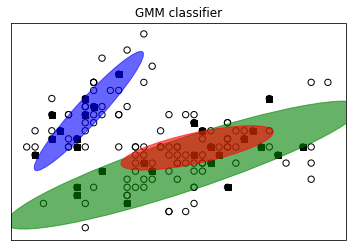

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

from sklearn import datasets
from sklearn.mixture import GMM
from sklearn.cross_validation import StratifiedKFold

# Load the iris dataset
iris = datasets.load_iris()

# Split dataset into training and testing (80/20 split)
indices = StratifiedKFold(iris.target, n_folds=5)

# Take the first fold
train_index, test_index = next(iter(indices))

# Extract training data and labels
X_train = iris.data[train_index]
y_train = iris.target[train_index]

# Extract testing data and labels
X_test = iris.data[test_index]
y_test = iris.target[test_index]

# Extract the number of classes
num_classes = len(np.unique(y_train))

# Build GMM
classifier = GMM(n_components=num_classes, covariance_type='full', 
        init_params='wc', n_iter=20)

# Initialize the GMM means 
classifier.means_ = np.array([X_train[y_train == i].mean(axis=0)
                              for i in range(num_classes)])

# Train the GMM classifier 
classifier.fit(X_train)

# Draw boundaries
plt.figure()
colors = 'bgr'
for i, color in enumerate(colors):
    # Extract eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(
            classifier._get_covars()[i][:2, :2])

    # Normalize the first eigenvector
    norm_vec = eigenvectors[0] / np.linalg.norm(eigenvectors[0])

    # Extract the angle of tilt
    angle = np.arctan2(norm_vec[1], norm_vec[0])
    angle = 180 * angle / np.pi 

    # Scaling factor to magnify the ellipses
    # (random value chosen to suit our needs)
    scaling_factor = 8
    eigenvalues *= scaling_factor 

    # Draw the ellipse
    ellipse = patches.Ellipse(classifier.means_[i, :2], 
            eigenvalues[0], eigenvalues[1], 180 + angle, 
            color=color)
    axis_handle = plt.subplot(1, 1, 1)
    ellipse.set_clip_box(axis_handle.bbox)
    ellipse.set_alpha(0.6)
    axis_handle.add_artist(ellipse)

# Plot the data 
colors = 'bgr'
for i, color in enumerate(colors):
    cur_data = iris.data[iris.target == i]
    plt.scatter(cur_data[:,0], cur_data[:,1], marker='o', 
            facecolors='none', edgecolors='black', s=40, 
            label=iris.target_names[i])

    test_data = X_test[y_test == i]
    plt.scatter(test_data[:,0], test_data[:,1], marker='s', 
            facecolors='black', edgecolors='black', s=40, 
            label=iris.target_names[i])

# Compute predictions for training and testing data
y_train_pred = classifier.predict(X_train)
accuracy_training = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
print('Accuracy on training data =', accuracy_training)
         
y_test_pred = classifier.predict(X_test)
accuracy_testing = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
print('Accuracy on testing data =', accuracy_testing)

plt.title('GMM classifier')
plt.xticks(())
plt.yticks(())

plt.show()

In [31]:
import datetime
import json

import numpy as np
import matplotlib.pyplot as plt
from sklearn import covariance, cluster
#from matplotlib.finance import quotes_historical_yahoo_ochl as quotes_yahoo
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data
import fix_yahoo_finance as yf
yf.pdr_override()


# Input file containing company symbols 
input_file = 'company_symbol_mapping.json'

# Load the company symbol map
with open(input_file, 'r') as f:
    company_symbols_map = json.loads(f.read())

symbols, names = np.array(list(company_symbols_map.items())).T



# Load the historical stock quotes 
#start_date = datetime.datetime(2003, 7, 3)
#end_date = datetime.datetime(2007, 5, 4)
#quotes = [quotes_yahoo(symbol, start_date, end_date, asobject=True) 
#                for symbol in symbols]
start_date = '2003-07-03'
end_date = '2003-07-14'
#quotes = [data.get_data_yahoo(symbol, start_date, end_date, asobject=True) 
#                for symbol in symbols]
quotes = [data.get_data_yahoo(symbols.tolist()[0:3], start_date, end_date)]

print(quotes)

# Extract opening and closing quotes
#opening_quotes = np.array([quote.open for quote in quotes]).astype(np.float)
#closing_quotes = np.array([quote.close for quote in quotes]).astype(np.float)
opening_quotes = np.array([quote['Open',] for quote in quotes]).astype(np.float)
closing_quotes = np.array([quote['Close',] for quote in quotes]).astype(np.float)

print(opening_quotes)


# Compute differences between opening and closing quotes 
quotes_diff = closing_quotes - opening_quotes

# Normalize the data 
X = quotes_diff.copy().T
X /= X.std(axis=0)

# Create a graph model 
edge_model = covariance.GraphLassoCV()

# Train the model
with np.errstate(invalid='ignore'):
    edge_model.fit(X)

# Build clustering model using Affinity Propagation model
_, labels = cluster.affinity_propagation(edge_model.covariance_)
num_labels = labels.max()

# Print the results of clustering
print('\nClustering of stocks based on difference in opening and closing quotes:\n')
for i in range(num_labels + 1):
    print("Cluster", i+1, "==>", ', '.join(names[labels == i]))

[*********************100%***********************]  3 of 3 downloaded


ValueError: zero-size array to reduction operation maximum which has no identity


Number of clusters in input data = 9

Centers of clusters:
Tsh	Tan	Hal	Tur	Tub	Swe
9823	4637	6539	2607	2228	1239
38589	44199	56158	5030	24674	4125
28333	34263	24065	5575	4229	18076
14987	46397	97393	1127	37315	3235
22617	77873	32543	1005	21035	837
104972	29186	19415	16016	5060	9372
38741	40539	20120	35059	255	50710
35314	16745	12775	66900	1298	5613
7852	4939	63081	134	40066	1332


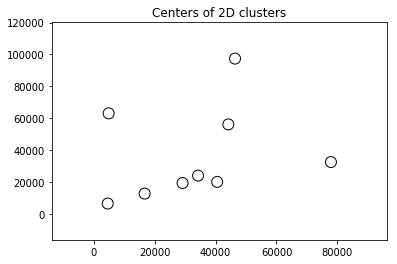

In [2]:
import csv

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# Load data from input file
input_file = 'sales.csv'
file_reader = csv.reader(open(input_file, 'r'), delimiter=',')
X = []
for count, row in enumerate(file_reader):
    if not count:
        names = row[1:]
        continue

    X.append([float(x) for x in row[1:]])

# Convert to numpy array
X = np.array(X)

# Estimating the bandwidth of input data
bandwidth = estimate_bandwidth(X, quantile=0.8, n_samples=len(X))

# Compute clustering with MeanShift
meanshift_model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift_model.fit(X)
labels = meanshift_model.labels_
cluster_centers = meanshift_model.cluster_centers_
num_clusters = len(np.unique(labels))

print("\nNumber of clusters in input data =", num_clusters)

print("\nCenters of clusters:")
print('\t'.join([name[:3] for name in names]))
for cluster_center in cluster_centers:
    print('\t'.join([str(int(x)) for x in cluster_center]))

# Extract two features for visualization 
cluster_centers_2d = cluster_centers[:, 1:3]

# Plot the cluster centers 
plt.figure()
plt.scatter(cluster_centers_2d[:,0], cluster_centers_2d[:,1], 
        s=120, edgecolors='black', facecolors='none')

offset = 0.25
plt.xlim(cluster_centers_2d[:,0].min() - offset * cluster_centers_2d[:,0].ptp(),
        cluster_centers_2d[:,0].max() + offset * cluster_centers_2d[:,0].ptp(),)
plt.ylim(cluster_centers_2d[:,1].min() - offset * cluster_centers_2d[:,1].ptp(),
        cluster_centers_2d[:,1].max() + offset * cluster_centers_2d[:,1].ptp())

plt.title('Centers of 2D clusters')
plt.show()

In [33]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader import data
import fix_yahoo_finance as yf
yf.pdr_override()

# Input file containing company symbols 
input_file = 'company_symbol_mapping.json'

# Load the company symbol map
with open(input_file, 'r') as f:
    company_symbols_map = json.loads(f.read())

symbols, names = np.array(list(company_symbols_map.items())).T

print(symbols.tolist())

#start_date = '2018-05-06' #startdate를 1996년으로 설정해두면 가장 오래된 데이터부터 전부 가져올 수 있다.
#tickers = ['067160.KQ', '035420.KS'] #1 아프리카tv와 네이버의 ticker(종목코드)

yahoo_finance = data.get_data_yahoo(symbols.tolist(), '2003-07-03', '2007-05-04')
yahoo_finance.to_csv('./yahoo_finance.csv')
#print(afreeca.head())
#print(np.sum(afreeca['Open']))



['TOT', 'XOM', 'CVX', 'COP', 'VLO', 'MSFT', 'IBM', 'TWX', 'CMCSA', 'CVC', 'YHOO', 'DELL', 'HPQ', 'AMZN', 'TM', 'CAJ', 'MTU', 'SNE', 'F', 'HMC', 'NAV', 'NOC', 'BA', 'KO', 'MMM', 'MCD', 'PEP', 'MDLZ', 'K', 'UN', 'MAR', 'PG', 'CL', 'GE', 'WFC', 'JPM', 'AIG', 'AXP', 'BAC', 'GS', 'AAPL', 'SAP', 'CSCO', 'TXN', 'XRX', 'LMT', 'WMT', 'WBA', 'HD', 'GSK', 'PFE', 'SNY', 'NVS', 'KMB', 'R', 'GD', 'RTN', 'CVS', 'CAT', 'DD']
[*********************100%***********************]  60 of 60 downloaded


In [35]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like

yahoo_finance = pd.read_csv('./yahoo_finance.csv')

0                    AAPL
1                     NaN
2                1.359286
3                1.357143
4      1.3764290000000001
5      1.3942860000000001
6                1.443571
7                    1.42
8      1.4042860000000001
9                1.429286
10                   1.43
11     1.4264290000000002
12               1.442143
13     1.4928569999999999
14               1.477857
15     1.4907139999999999
16               1.496429
17     1.5028569999999999
18               1.457857
19               1.535714
20     1.4992860000000001
21               1.483571
22               1.481429
23                    1.5
24               1.466429
25                  1.525
26               1.432857
27               1.409286
28     1.4364290000000002
29               1.415714
              ...        
938                 13.39
939    13.335714000000001
940             13.427143
941             13.672857
942             13.554286
943    13.455714000000002
944             13.468572
945         

In [38]:
print(yahoo_finance['Open', 'AAPL'])

KeyError: ('Open', 'AAPL')

In [44]:
import datetime
import json

import numpy as np
import matplotlib.pyplot as plt
from sklearn import covariance, cluster
#from matplotlib.finance import quotes_historical_yahoo_ochl as quotes_yahoo
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data
import fix_yahoo_finance as yf
yf.pdr_override()

# Input file containing company symbols 
input_file = 'company_symbol_mapping_1.json'

# Load the company symbol map
with open(input_file, 'r') as f:
    company_symbols_map = json.loads(f.read())

symbols, names = np.array(list(company_symbols_map.items())).T

# Load the historical stock quotes 
start_date = '2003-07-03'
end_date = '2007-05-04'
quotes = [data.get_data_yahoo(symbol, start_date, end_date, asobject=True) 
                for symbol in symbols]

# Extract opening and closing quotes
opening_quotes = np.array([quote['Open'] for quote in quotes]).astype(np.float)
closing_quotes = np.array([quote['Close'] for quote in quotes]).astype(np.float)

# Compute differences between opening and closing quotes 
quotes_diff = closing_quotes - opening_quotes

# Normalize the data 
X = quotes_diff.copy().T
X /= X.std(axis=0)

# Create a graph model 
edge_model = covariance.GraphLassoCV()

# Train the model
with np.errstate(invalid='ignore'):
    edge_model.fit(X)

# Build clustering model using Affinity Propagation model
_, labels = cluster.affinity_propagation(edge_model.covariance_)
num_labels = labels.max()

# Print the results of clustering
print('\nClustering of stocks based on difference in opening and closing quotes:\n')
for i in range(num_labels + 1):
    print("Cluster", i+1, "==>", ', '.join(names[labels == i]))

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded

Clustering of stocks based on difference in opening and closing quotes:

Cluster 1 ==> Total
Cluster 2 ==> Exxon, Chevron, ConocoPhillips
Cluster 3 ==> Valero Energy


In [102]:
import datetime
import json

import numpy as np
import matplotlib.pyplot as plt
from sklearn import covariance, cluster
#from matplotlib.finance import quotes_historical_yahoo_ochl as quotes_yahoo
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data
import fix_yahoo_finance as yf
yf.pdr_override()

# Input file containing company symbols 
input_file = 'company_symbol_mapping_2.json'

# Load the company symbol map
with open(input_file, 'r') as f:
    company_symbols_map = json.loads(f.read())

symbols, names = np.array(list(company_symbols_map.items())).T

# Load the historical stock quotes 
start_date = '2003-07-03'
end_date = '2007-05-04'
quotes = data.get_data_yahoo(symbols.tolist(), start_date, end_date, group_by = 'ticker')


[*********************100%***********************]  54 of 54 downloaded


In [104]:
#print(quotes.columns.levels[0])
#print(quotes.columns.levels[0][0])
opening_quotes = []
closing_quotes = []
for i in range(quotes.columns.levels[0].size):
    #print(i)
    #print(quotes[quotes.columns.levels[0][i]]['Open'])
    opening_quotes.append(quotes[quotes.columns.levels[0][i]]['Open'])
    closing_quotes.append(quotes[quotes.columns.levels[0][i]]['Close'])

# Extract opening and closing quotes
#opening_quotes = np.array(quotes['Open'].T).astype(np.float)
#closing_quotes = np.array(quotes['Close'].T).astype(np.float)
opening_quotes = np.array(opening_quotes).astype(np.float)
closing_quotes = np.array(closing_quotes).astype(np.float)

# Compute differences between opening and closing quotes 
quotes_diff = closing_quotes - opening_quotes

# Normalize the data 
X = quotes_diff.copy().T
X /= X.std(axis=0)

# Create a graph model 
edge_model = covariance.GraphLassoCV()

# Train the model
with np.errstate(invalid='ignore'):
    edge_model.fit(X)

# Build clustering model using Affinity Propagation model
_, labels = cluster.affinity_propagation(edge_model.covariance_)
num_labels = labels.max()

# Print the results of clustering
print('\nClustering of stocks based on difference in opening and closing quotes:\n')
for i in range(num_labels + 1):
    print("Cluster", i+1, "==>", ', '.join(names[labels == i]))

[0 0 0 0 0 6 6 5 6 6 1 1 1 1 1 5 2 1 4 6 5 4 3 4 1 5 4 4 6 5 5 5 5 5 5 1 1
 6 6 1 2 5 7 5 8 8 8 8 4 5 2 2 7 1]

Clustering of stocks based on difference in opening and closing quotes:

Cluster 1 ==> Total, Exxon, Chevron, ConocoPhillips, Valero Energy
Cluster 2 ==> Toyota, Canon, Sony, Ford, Honda, Boeing, Unilever, Apple, SAP, Xerox, Caterpillar
Cluster 3 ==> Northrop Grumman, Lookheed Martin, General Dynamics, Raytheon
Cluster 4 ==> Kraft Foods
Cluster 5 ==> Coca Cola, Pepsi, Kellogg, Procter Gamble, Colgate-Palmolive, Kimberly-Clark
Cluster 6 ==> Comcast, Navistar, Mc Donalds, Marriott, Wells Fargo, JPMorgan Chase, AIG, American express, Bank of America, Goldman Sachs, Wal-Mart, Home Depot, Ryder
Cluster 7 ==> Microsoft, IBM, HP, Amazon, 3M, General Electrics, Cisco, Texas instruments
Cluster 8 ==> Walgreen, CVS
Cluster 9 ==> GlaxoSmithKline, Pfizer, Sanofi-Aventis, Novartis
